# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Fixing random state for reproducibility
np.random.seed(2360873)

In [2]:
renda_prev = pd.read_csv("previsao_de_renda.csv")

renda_prev.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [10]:
#verificando quais são as variáveis quali
#resolvi considerar as booleanas também

renda_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [12]:
renda_prev_quali = renda_prev[['data_ref','sexo','posse_de_veiculo','posse_de_imovel',
                               'tipo_renda','educacao','estado_civil','tipo_residencia','mau']]

renda_prev_quali.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


In [62]:
renda_prev_quali.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
       'educacao', 'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')

#### Observação:

Tentei realizar a tarefa 1 de duas formas: i) fazer um gráfico de barras para analisar todas as variáveis entre si a partir de um laço for, isso gerou 9 gráficos (incluindo data x data, que é redundante) em uma mesma figura (favor scrollar). ii) gerar o mesmo gráfico em uma figura com grid, o que acarretou alguns gráficos "sumindo". Não consegui entender, por hora, porque isso aconteceu, mas consegui ver todos os gráficos e a análise está abaixo.

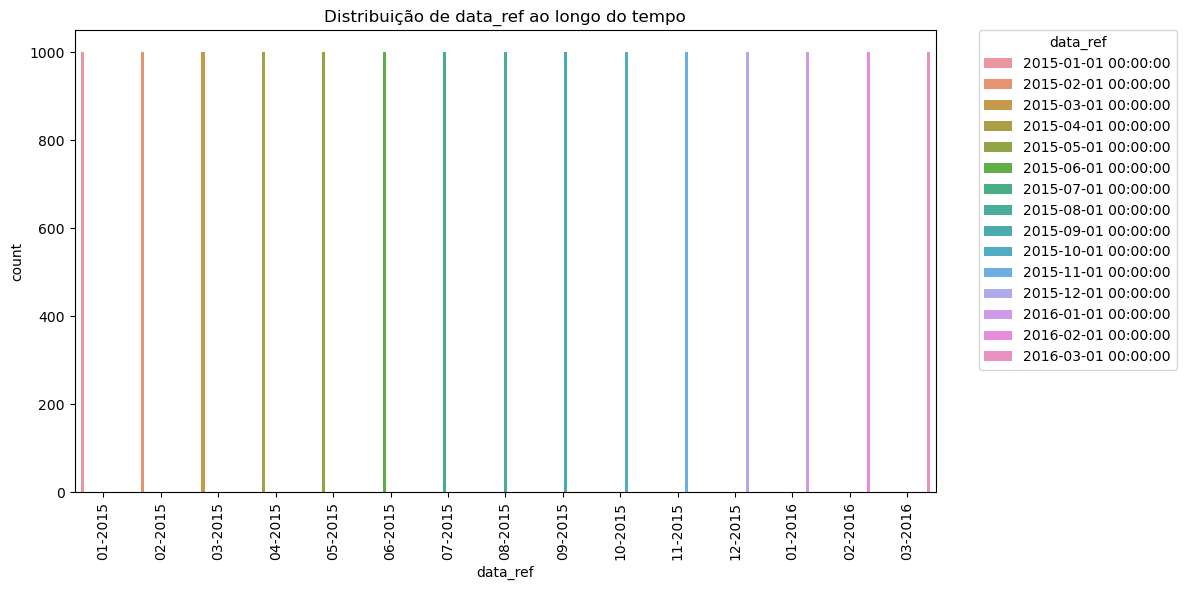

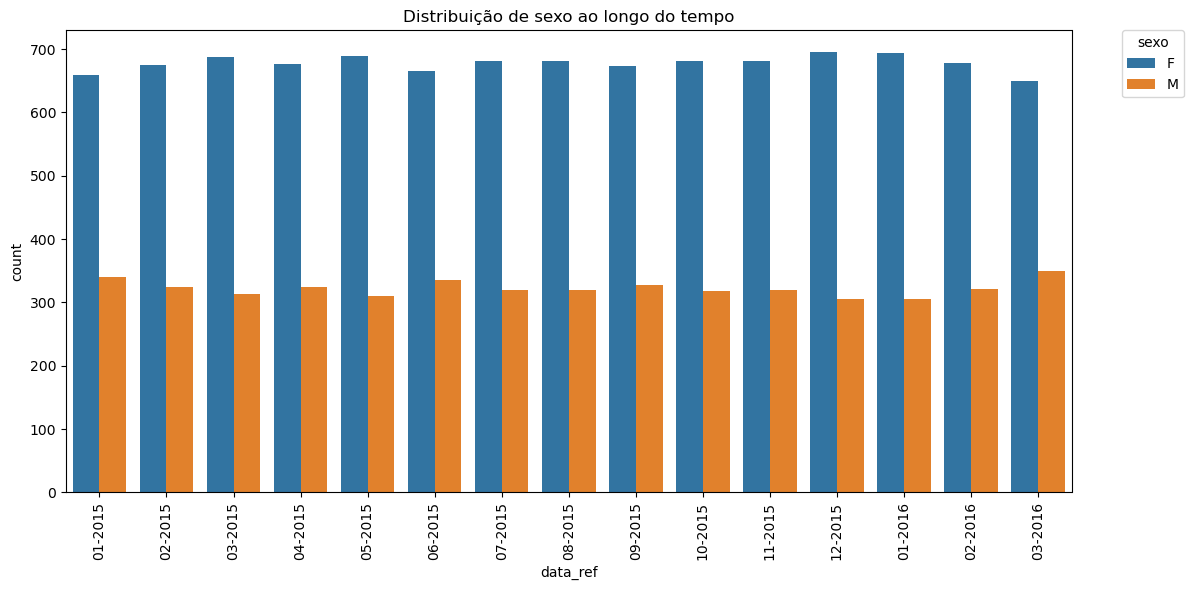

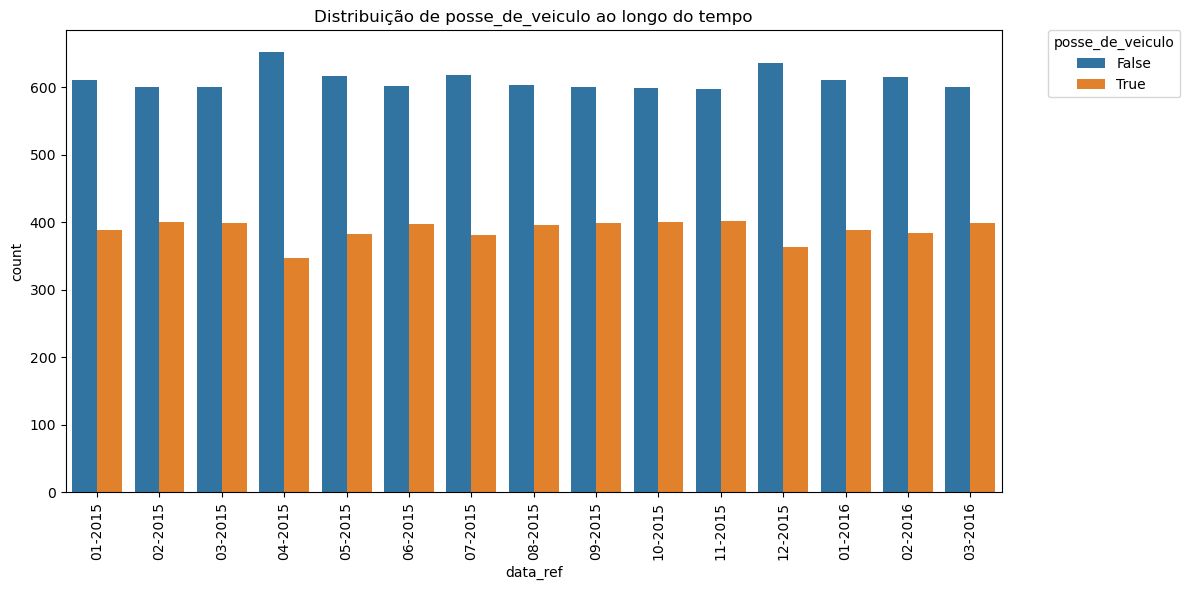

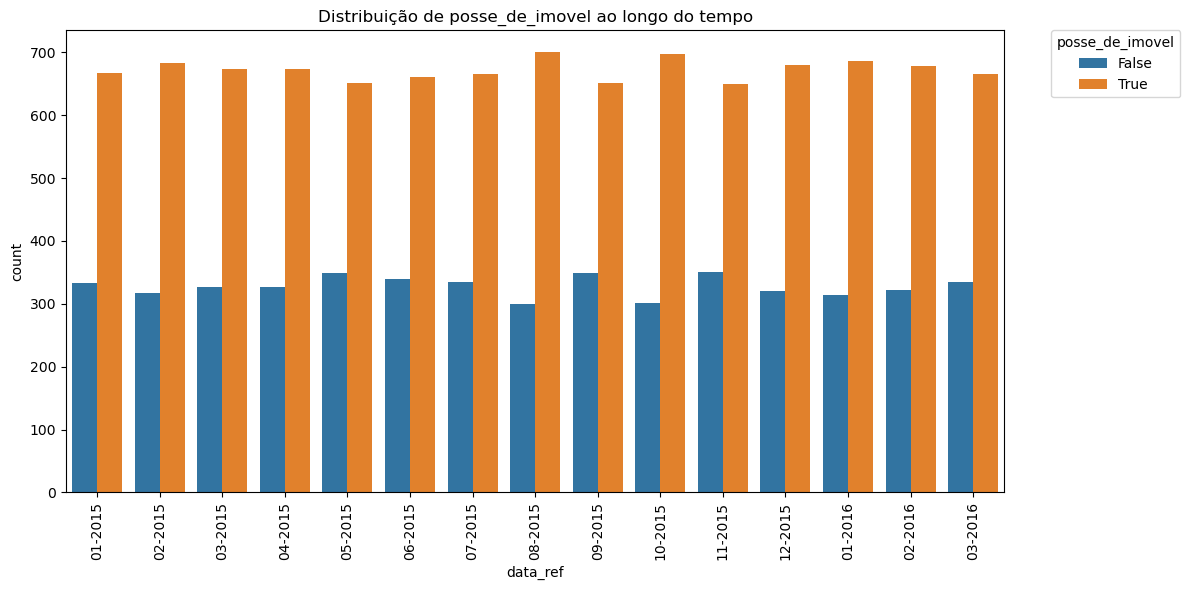

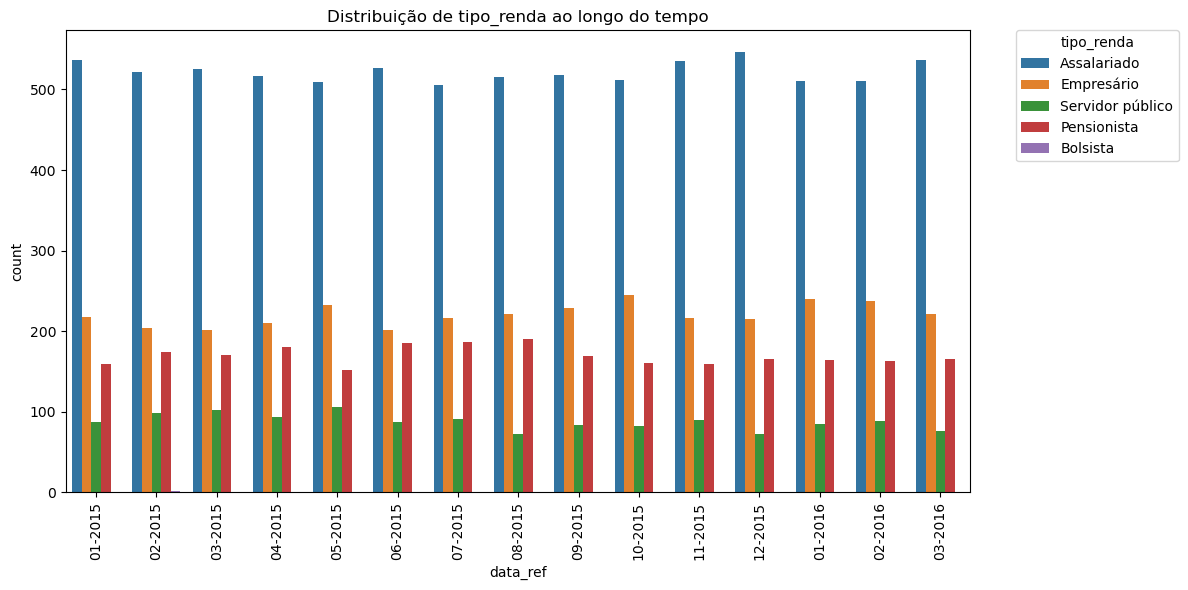

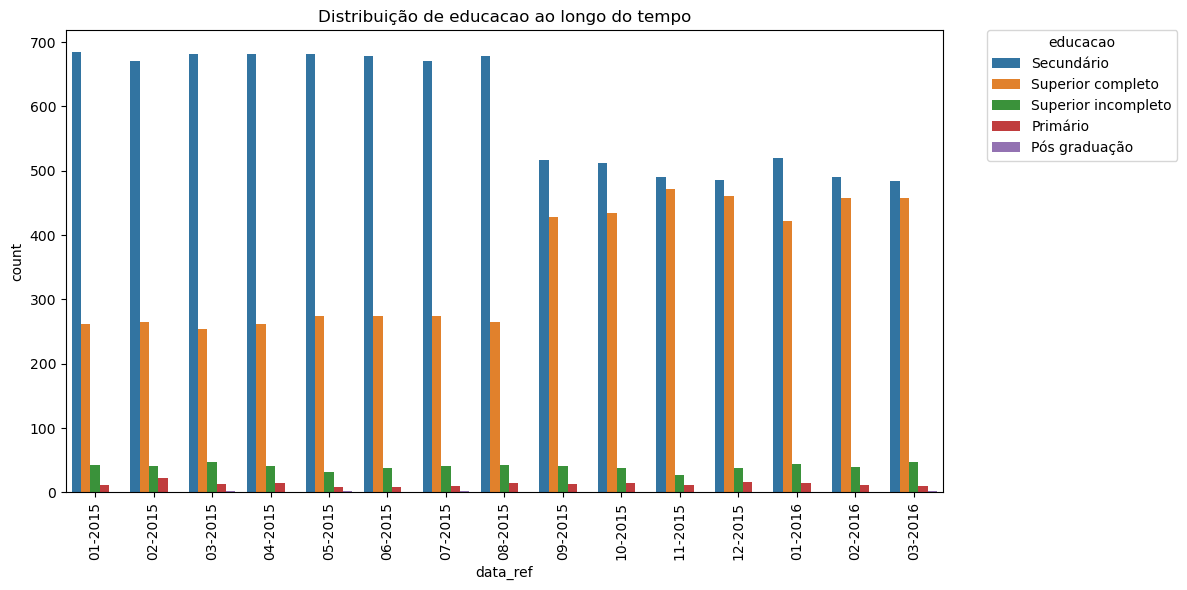

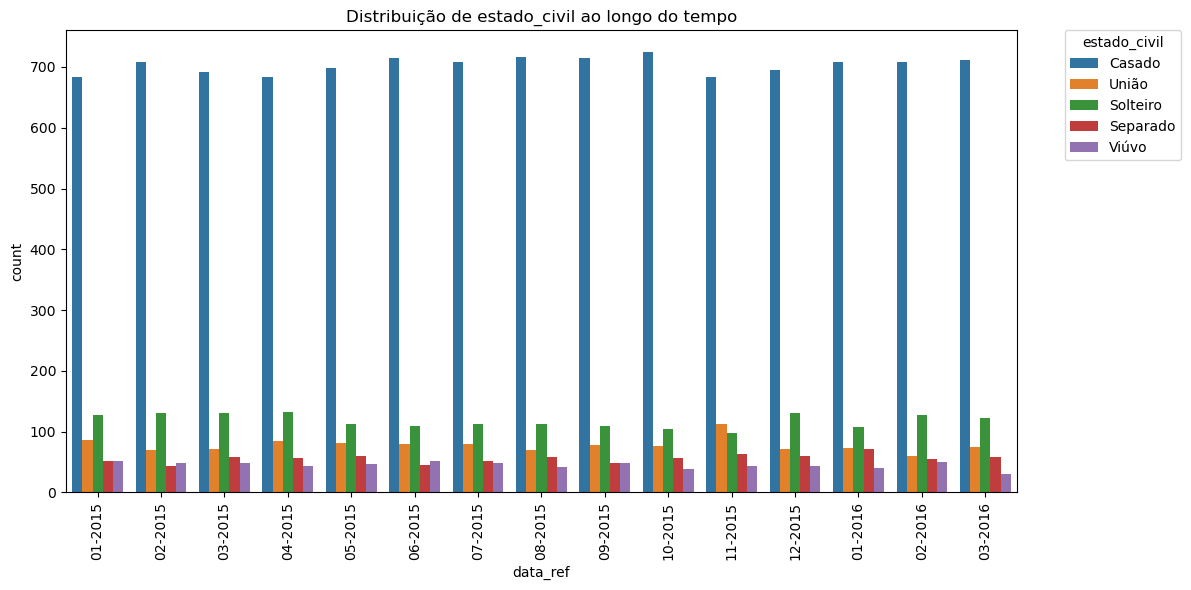

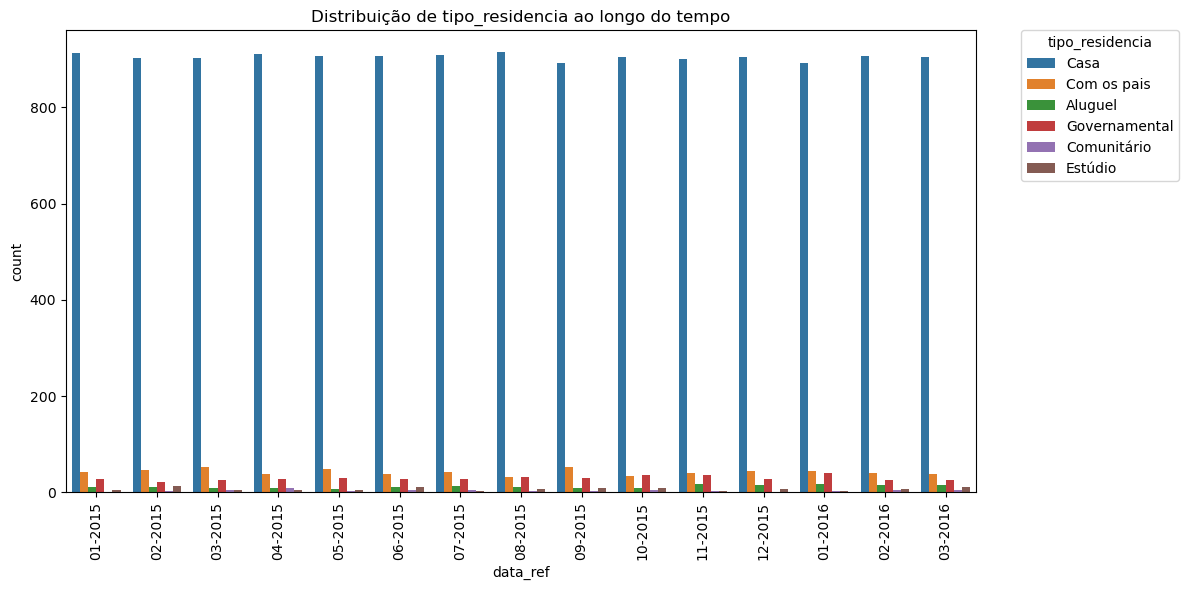

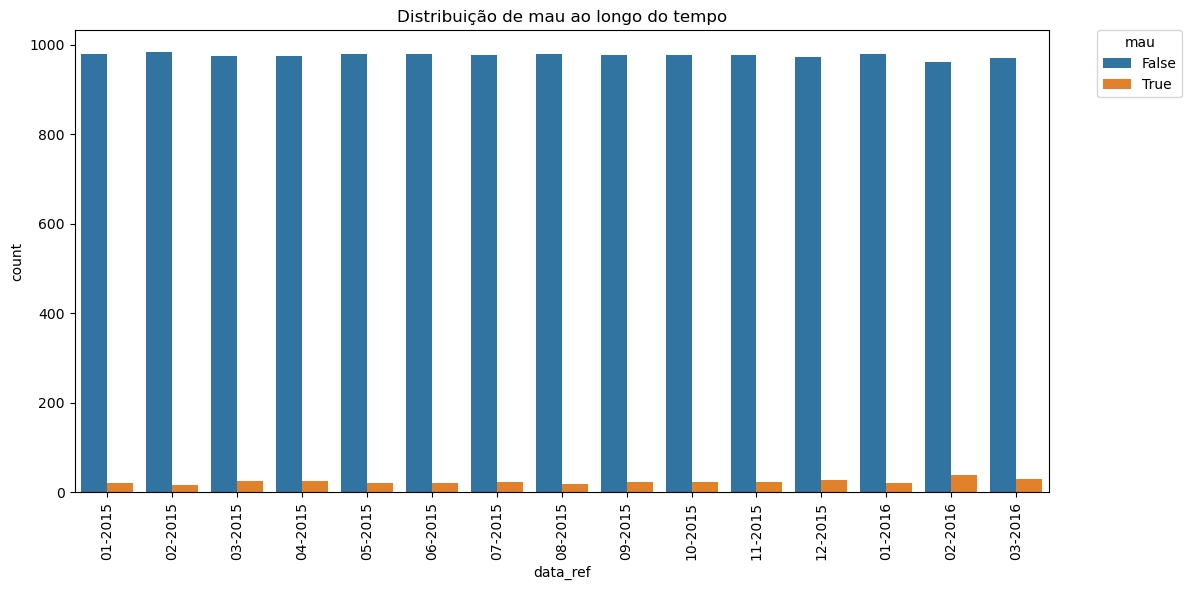

In [30]:
for col in renda_prev_quali.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='data_ref', hue=col, data=renda_prev_quali)

    tick_labs = renda_prev_quali['data_ref'].dt.strftime("%m-%Y").unique()
    ax.set_xticklabels(tick_labs, rotation=90)

    plt.title(f'Distribuição de {col} ao longo do tempo')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()

    plt.show()

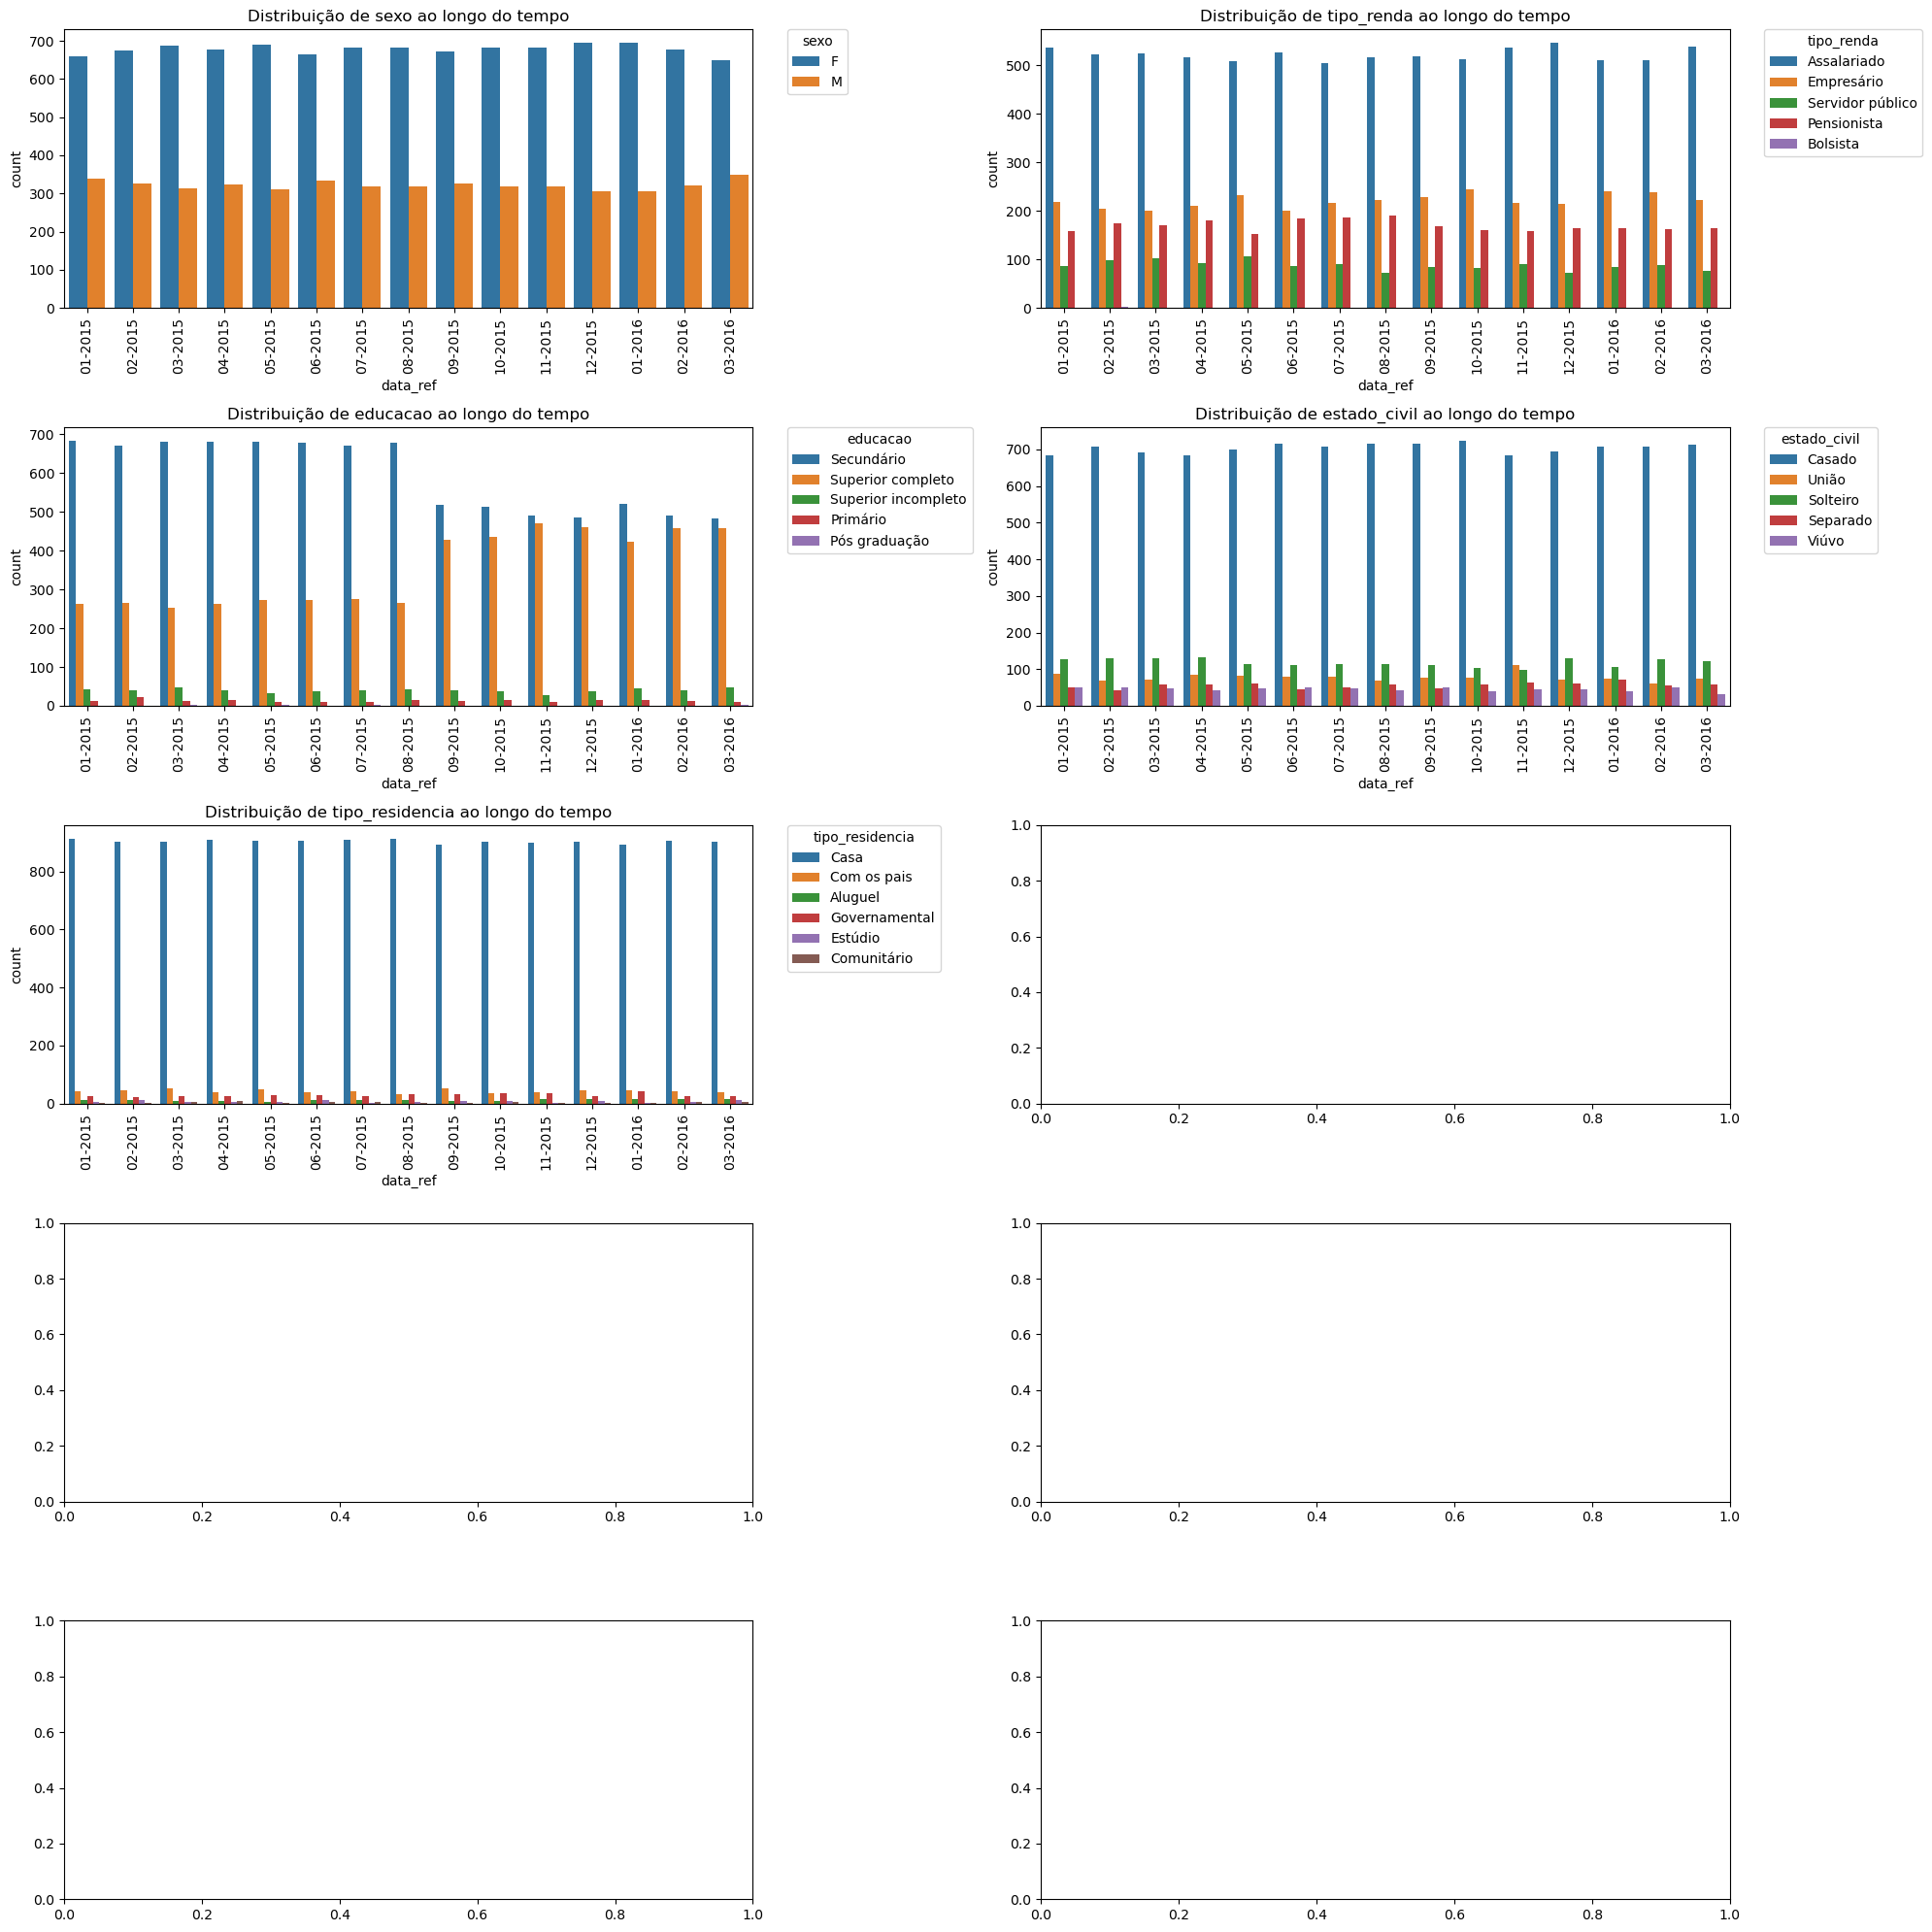

In [42]:

num_cols = 2  
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()  

for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    sns.countplot(x='data_ref', hue=col, data=renda_prev_quali, ax=ax)
    
    tick_labs = renda_prev_quali['data_ref'].dt.strftime("%m-%Y").unique()
    
    ax.set_xticks(range(len(tick_labs)))
    ax.set_xticklabels(tick_labs, rotation=90)
    
    ax.set_title(f'Distribuição de {col} ao longo do tempo')
    ax.legend(title=col, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.tight_layout()
plt.show()


### Análise

O único gráfico que vi diferença significativa foi educação ao longo do tempo: a partir de 9/15 o número de secundaristas diminuiu e o número de graduados com ensino superior aumentou.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

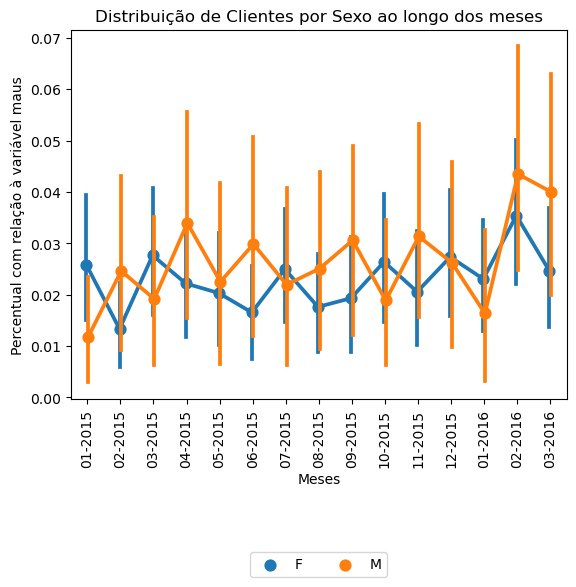

In [70]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'sexo',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Sexo ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

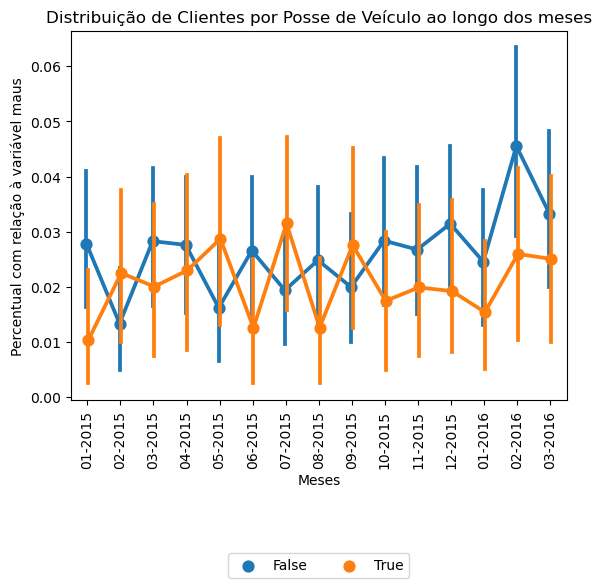

In [71]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'posse_de_veiculo',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Posse de Veículo ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

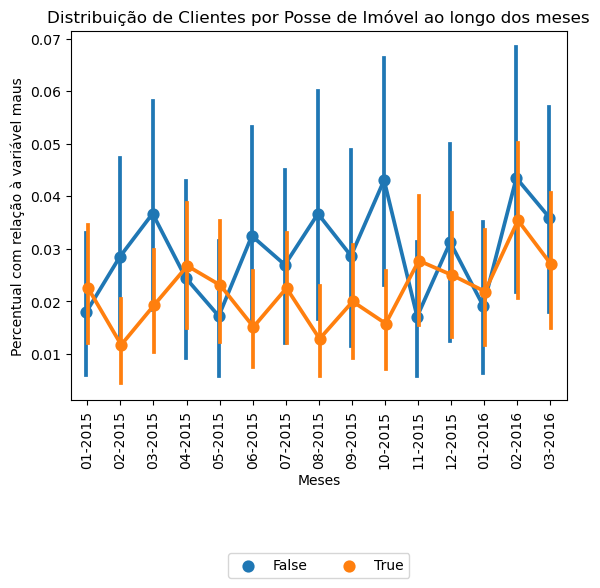

In [72]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'posse_de_imovel',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Posse de Imóvel ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

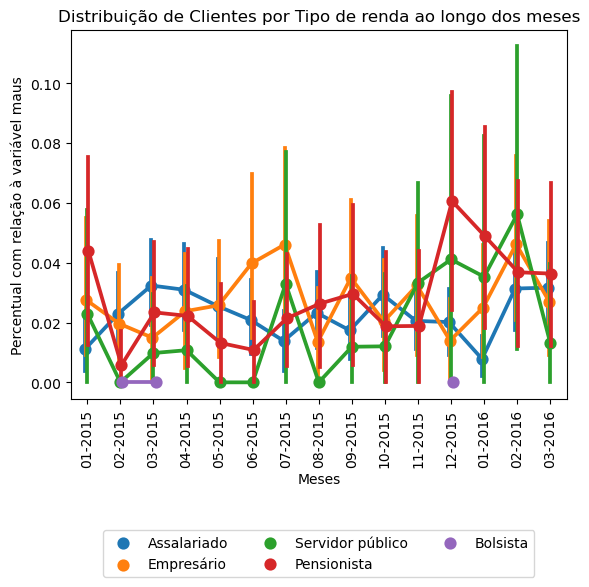

In [73]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'tipo_renda',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Tipo de renda ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

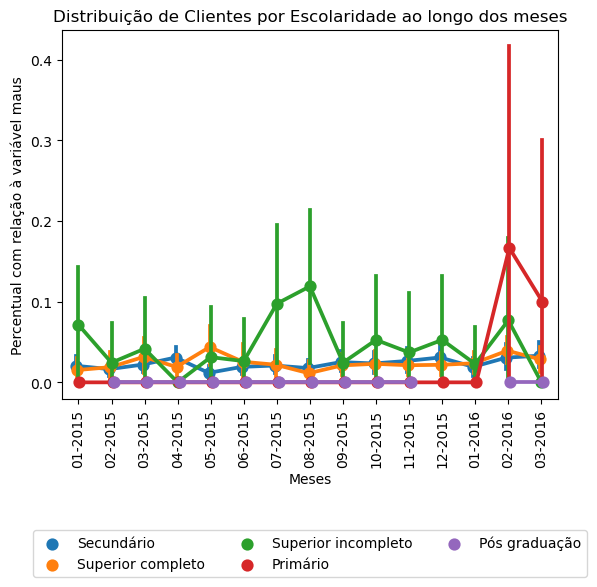

In [74]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'educacao',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Escolaridade ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

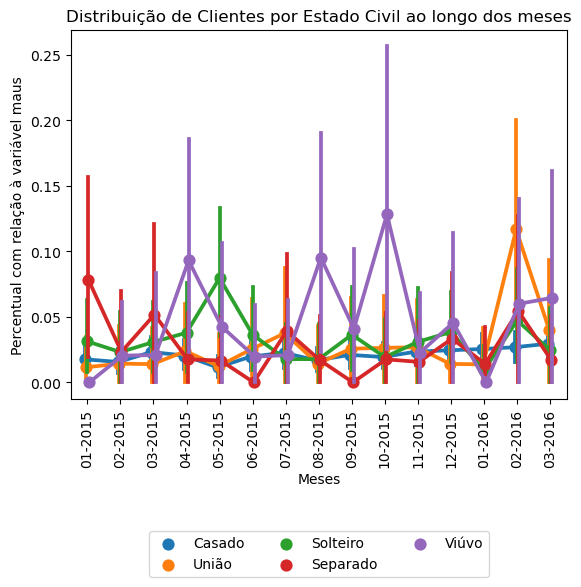

In [75]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'estado_civil',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Estado Civil ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

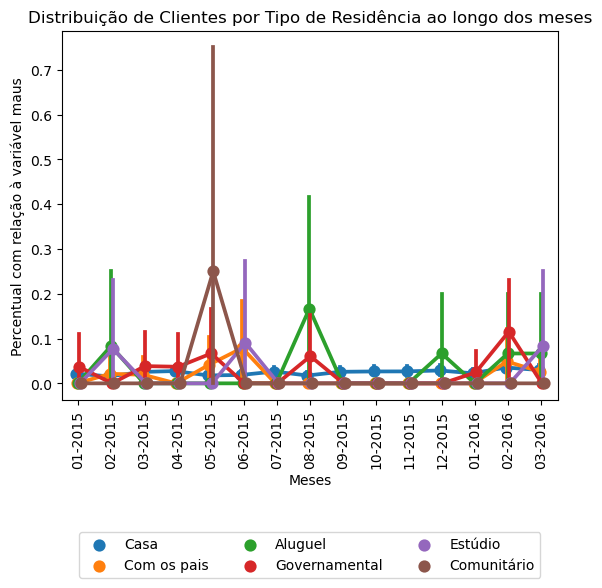

In [76]:
ax = sns.pointplot(x="data_ref", y="mau", hue = 'tipo_residencia',
                   data=renda_prev_quali, dodge=True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda_prev_quali['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda_prev_quali['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

ax.set_title('Distribuição de Clientes por Tipo de Residência ao longo dos meses')
ax.set_xlabel('Meses')
ax.set_ylabel('Percentual com relação à variável maus')

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

'data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
       'educacao', 'estado_civil', 'tipo_residencia', 'mau'

### Conclusões

Escolhi fazer avaliações com relação à variável 'maus'. Dada a característica aberta da atividade, a variável maus acaba sendo a mais relavante com relação à análise de crédito. 

Não consegui, na tarefa 2, ver grandes variações. Sempre que uma categoria oscilava para cima ou para baixo com relação à variável maus, a barra de erro era grande o suficiente para colocar em suspeição se aquela mudança é realmente relevante.

Como os modelos prescisam de estabilidade para sua consistência, ainda pela tarefa 1, excluiria apenas a variável, como exposta no item 1: "educação ao longo do tempo: a partir de 9/15 o número de secundaristas diminuiu e o número de graduados com ensino superior aumentou."